# ▒ 군집분석 ▒

## 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler                                     # 평균0, 분산1로 전처리 : 거리 기반 kmeans이기 때문에 각각의 변수들마다 scale을 맞춰줘야 함. dominate 방지
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, single, complete  # 계층적 군집 분석 

from sklearn import datasets 

## 1. 데이터 준비
### 데이터 호출

In [2]:
iris = datasets.load_iris()

In [ ]:
Iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(Iris.shape)
# featurs
# 50개만 랜덤하게 선택.
np.random.seed(1234)
random_ind = np.random.choice(np.arange(150),50)         # 150개 중에서 50개 씀
Iris = Iris.iloc[random_ind, 0:4]
print(Iris.shape)
Iris.head()

(150, 4)
(50, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
38,4.4,3.0,1.3,0.2
53,5.5,2.3,4.0,1.3
116,6.5,3.0,5.5,1.8
143,6.8,3.2,5.9,2.3


### 표준화하기

In [ ]:
Iris_st = StandardScaler().fit_transform(Iris)           # numpy형태
feature_names = ['sepal_length','sepal_width',
                 'petal_length','petal_width']
Iris_st = pd.DataFrame(Iris_st, columns=feature_names)   # numpy형태 -> dataframe형식으로 변환
Iris_st.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.385105,0.476636,-1.302324,-1.301167
1,-1.610692,0.009346,-1.357742,-1.301167
2,-0.369963,-1.626168,0.138545,0.121580
3,0.757973,0.009346,0.969816,0.768284
4,1.096353,0.476636,1.191488,1.414987


## 2. 계층적 군집분석

### 계층적 군집 분석 - 최단 연결법
- 유클리디안 거리 이용

In [ ]:
single_dist = linkage(Iris_st,method='single',  #최단연결법
                     metric='euclidean')

### 덴드로그램 그리기

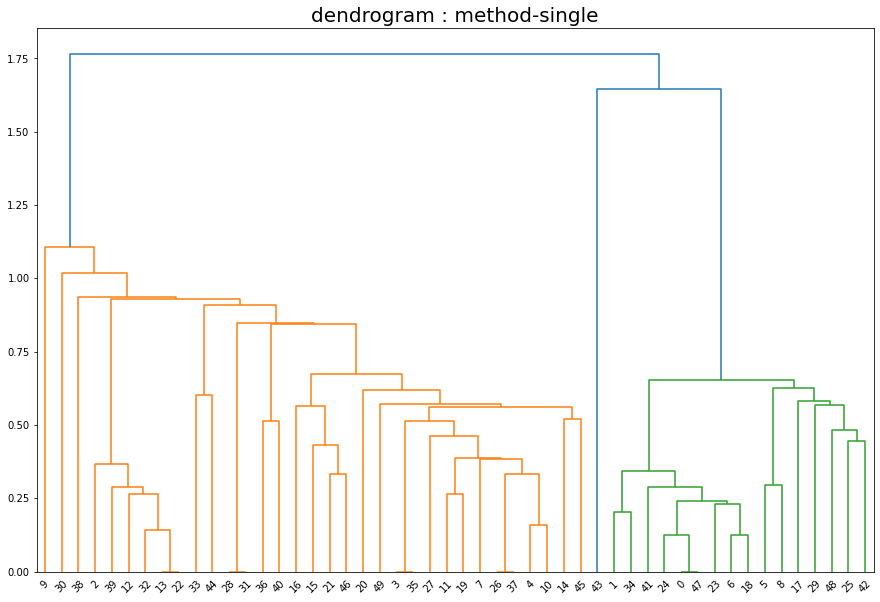

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(single_dist,
           leaf_rotation=45,
           leaf_font_size=10,
)
plt.title('dendrogram : method-single', fontsize=20)
plt.show()

### 계층적 군집 분석 - 최장 연결법

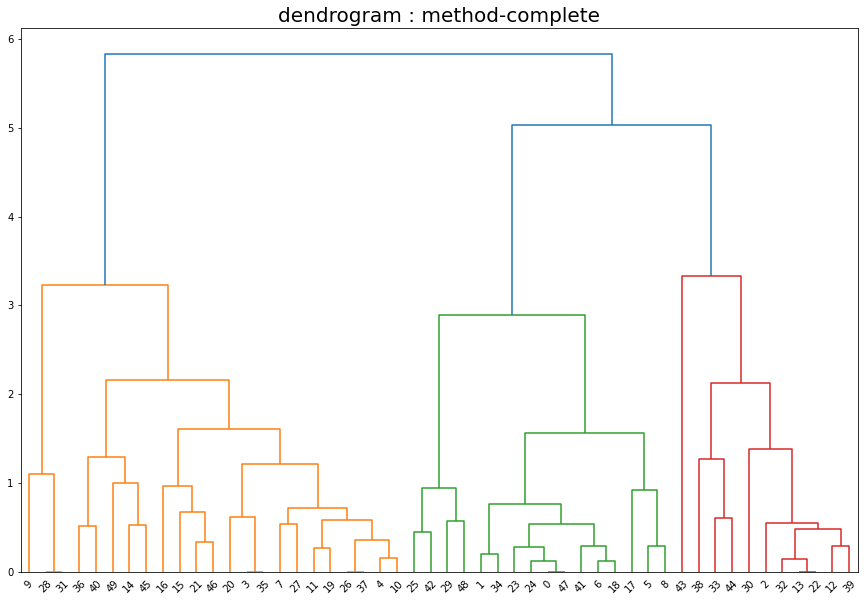

In [ ]:
complete_dist = linkage(Iris_st,method='complete',
                       metric='euclidean')

plt.figure(figsize = (15,10))
dendrogram(complete_dist,
           leaf_rotation = 45,
           leaf_font_size = 10)
plt.title('dendrogram : method-complete',fontsize=20)
plt.show()

### 군집 설정 및 시각화 - 최단 연결법

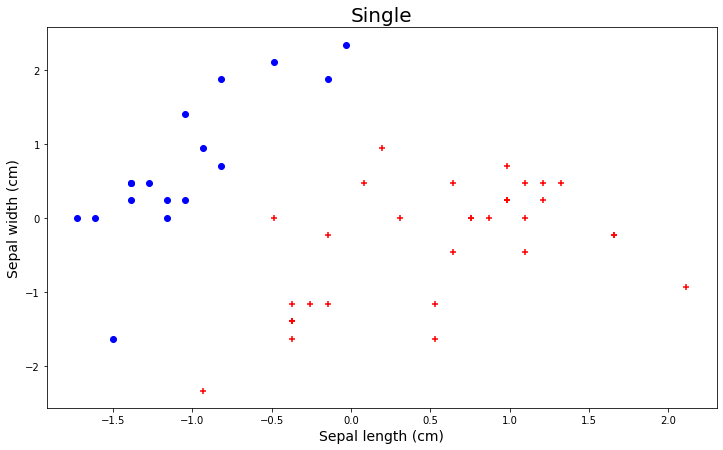

In [ ]:
cluster_results=fcluster(single_dist,2,criterion='maxclust')
cluster_color = np.where(cluster_results == 1, 'red', 'blue')
cluster_mark = np.where(cluster_results == 1, '+', 'o')

plt.figure(1, figsize=(12, 7))
for RowIdx in range(len(Iris_st)):
    plt.scatter(Iris_st['sepal_length'].iloc[RowIdx], 
                Iris_st['sepal_width'].iloc[RowIdx], 
                c=cluster_color[RowIdx],
                marker=cluster_mark[RowIdx])

plt.title('Single', fontsize=20)
plt.xlabel('Sepal length (cm)', fontsize=14)
plt.ylabel('Sepal width (cm)', fontsize=14)
plt.show()


### 군집 설정 및 시각화 - 최장 연결법

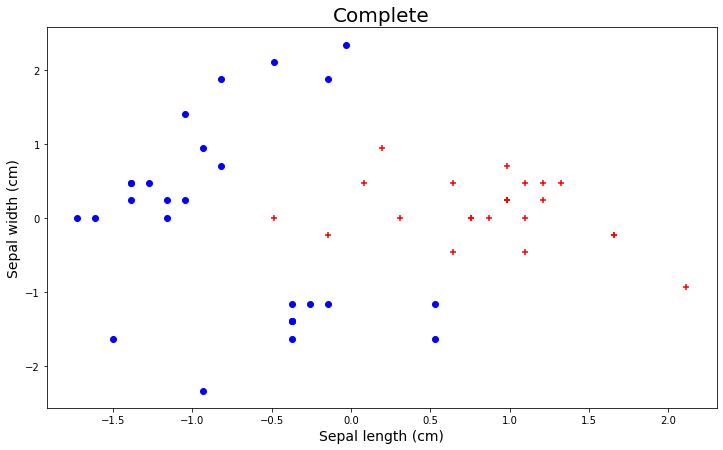

In [ ]:
cluster_results=fcluster(complete_dist,2,criterion='maxclust')
cluster_color = np.where(cluster_results == 1, 'red', 'blue')
cluster_mark = np.where(cluster_results == 1, '+', 'o')

plt.figure(1, figsize=(12, 7))
for RowIdx in range(len(Iris_st)):
    plt.scatter(Iris_st['sepal_length'].iloc[RowIdx], 
                Iris_st['sepal_width'].iloc[RowIdx], 
                c=cluster_color[RowIdx],
                marker=cluster_mark[RowIdx])

plt.title('Complete', fontsize=20)
plt.xlabel('Sepal length (cm)', fontsize=14)
plt.ylabel('Sepal width (cm)', fontsize=14)
plt.show()


## 3. 비계층적 군집분석

### K-means clustering

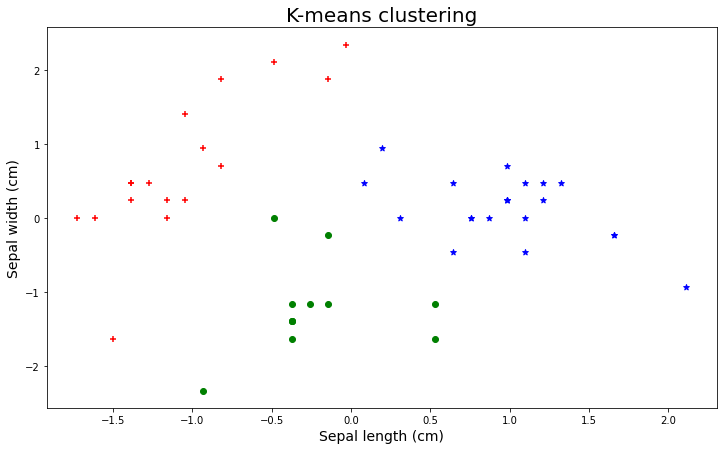

In [ ]:
# 군집 수 = 3
kmeans_model = KMeans(n_clusters = 3, init = "random",                       # init : 초기 중심 설정을 random하게 샘플 골라서 걔를 중심을 줘~!~!
                      n_init = 1, random_state = 10).fit(Iris_st)

cluster_results = kmeans_model.labels_                                      # 어떤 값에 속하는지 index
cluster_color = np.where(cluster_results == 1, 'red', 
                         np.where(cluster_results == 2, 'green', 'blue'))
cluster_mark = np.where(cluster_results == 1, '+', 
                        np.where(cluster_results == 2, 'o', '*'))

plt.figure(1, figsize=(12, 7))
for RowIdx in range(len(Iris_st)):
    plt.scatter(Iris_st['sepal_length'].iloc[RowIdx], 
                Iris_st['sepal_width'].iloc[RowIdx], 
                c=cluster_color[RowIdx],
                marker=cluster_mark[RowIdx])

plt.title('K-means clustering', fontsize=20)
plt.xlabel('Sepal length (cm)', fontsize=14)
plt.ylabel('Sepal width (cm)', fontsize=14)
plt.show()


### 최적의 군집의 수 선택 (Elbow method)

#### 군집 내 응집도를 바탕으로 계산

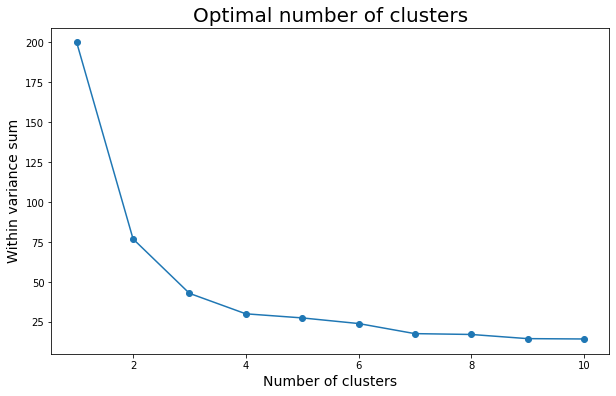

In [ ]:
elbow = []
for nclusters in range(1, 11):        # 1부터 10까지 클러스터 고려하면서 k-means_model의 응집도를 elbow에
    i_kmeans_model = KMeans(n_clusters = nclusters, 
                            init = "random", n_init = 1, 
                            random_state = 10).fit(Iris_st)
    #inertia가 군집 내의 분산을 의미 : 평균적인 응집도
    elbow.append(i_kmeans_model.inertia_)

# plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), elbow, marker='o')
plt.title('Optimal number of clusters', fontsize=20)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Within variance sum', fontsize=14)
plt.show()

- 군집을 4개에서 5개로 늘리면서부터 응집도의 개선이 거의 이루어지지 않음.
- 따라서, 최적의 군집의 수는 4이라고 할 수 있음